<a href="https://colab.research.google.com/github/tanay2001/Stock-Trading-Bot-/blob/master/Models/wavenet_model_for_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
import tensorflow as tf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import gc
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
merged_data = pd.DataFrame()
os.chdir('/content/drive/My Drive/stonks_data/hist/')
for filename in os.listdir(os.getcwd()):
  try:
   os.chdir(filename)
   print(filename)
   for datafile in os.listdir(os.getcwd()):
          dataset=pd.read_csv(datafile)
          dataset.index = [datafile.split('.')[0]]*dataset.shape[0]
          merged_data = merged_data.append(dataset)
   os.chdir('/content/drive/My Drive/stonks_data/hist/')
  except:
    pass

Auto 
Banks
Cement and Construction
Finance
IT
Metals
Petroleum
Pharma
Retail 
Entertainment
Telecom
FMCG
Chemicals
Indices


In [4]:
merged_data.index.unique()

Index(['M&M', 'TATAMOTORS', 'MARUTI', 'EXIDEIND', 'MOTHERSUMI', 'BOSCHLTD',
       'BAJAJ-AUTO', 'HEROMOTOCO', 'AXISBANK', 'HDFCBANK', 'ICICIBANK',
       'INDUSINDBK', 'KOTAKBANK', 'SBIN', 'ULTRACEMCO', 'SHREECEM',
       'AMBUJACEM', 'DLF', 'LT', 'OBEROIRLTY', 'BAJAJFINSV', 'CHOLAFIN',
       'HDFCAMC', 'M&MFIN', 'SBICARD', 'HDFC', 'IBULHSGFIN', 'BAJFINANCE',
       'ICICIPRULI', 'CRISIL', 'INFY', 'TCS', 'WIPRO', 'TECHM', 'HCLTECH',
       'TATASTEEL', 'JINDALSTEL', 'HINDALCO', 'VEDL', 'JSWSTEEL', 'RELIANCE',
       'HINDPETRO', 'IOC', 'ONGC', 'BPCL', 'GAIL', 'APOLLOHOSP', 'METROPOLIS',
       'CIPLA', 'GLENMARK', 'DRREDDY', 'LUPIN', 'SUNPHARMA', 'TORNTPHARM',
       'AUROPHARMA', 'FINPIPE', 'VIPIND', 'DMART', 'SPENCERS', 'FRETAIL',
       'TITAN', 'ZEEL', 'PVR', 'SUNTV', 'DISHTV', 'HATHWAY', 'BHARTIARTL',
       'ITC', 'TATACOFFEE', 'EVEREADY', 'GODFRYPHLP', 'HINDUNILVR',
       'BRITANNIA', 'COLPAL', 'AVANTIFEED', 'DABUR', 'NESTLEIND', 'MARICO',
       'GODREJCP', 'JUBLFOOD', 'TATA

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    Xtrain = []
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=10, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.shuffle(shuffle_buffer)
    gc.collect()
    for X in ds:
      Xtrain.append(X.numpy())
    return  np.asarray(Xtrain)


In [6]:
 merged_data.reset_index(inplace = True)
 data = merged_data.groupby('index')

In [42]:
final = np.empty((0,210,13))
for grp in tqdm(merged_data['index'].unique()):
    train = pd.DataFrame(data.get_group(grp))
    train['ma50'] = train['Close'].rolling(50).mean()
    train['ma150'] = train['Close'].rolling(150).mean()
    train['trend'] = train['ma150'] - train['ma50']
    train['upper_level'] = train['upper_band'] - train['High']
    train['lower_level'] = train['Low']-train['lower_band']
    train['trend_2'] = train['26ema'] - train['12ema']
    train.dropna(inplace = True)
    series = windowed_dataset(train[['Close','trend','Volume', 'ma21','ma50','trend_2','12ema','MACD','20std','upper_level','lower_level','sar','rsi']].values, 210, 32, 100)
    if series.shape[0] !=0:
      for i in range(13):
        #series[:,:,i]  = (series[:,:,i] - series[:,:,i].mean())/series[:,:,i].std()
        series[:,:,i] = (series[:,:,i] - series[:,:,i].min()) / (series[:,:,i].max() - series[:,:,i].min())
        series[:,:,i] = series[:,:,i] * (1 - 0) + 0
      final = np.append(final,values = series, axis =0)
    gc.collect()
    del train, series



  0%|          | 0/89 [00:00<?, ?it/s]

  1%|          | 1/89 [00:00<00:50,  1.76it/s]

  2%|▏         | 2/89 [00:01<00:47,  1.85it/s]

  3%|▎         | 3/89 [00:01<00:44,  1.91it/s]

  4%|▍         | 4/89 [00:01<00:42,  1.98it/s]

  6%|▌         | 5/89 [00:02<00:41,  2.01it/s]

  7%|▋         | 6/89 [00:02<00:40,  2.05it/s]

  8%|▊         | 7/89 [00:03<00:37,  2.20it/s]

  9%|▉         | 8/89 [00:03<00:37,  2.17it/s]

 10%|█         | 9/89 [00:04<00:37,  2.16it/s]

 11%|█         | 10/89 [00:04<00:36,  2.15it/s]

 12%|█▏        | 11/89 [00:05<00:36,  2.11it/s]

 13%|█▎        | 12/89 [00:05<00:36,  2.10it/s]

 15%|█▍        | 13/89 [00:06<00:36,  2.08it/s]

 16%|█▌        | 14/89 [00:06<00:36,  2.07it/s]

 17%|█▋        | 15/89 [00:07<00:35,  2.08it/s]

 18%|█▊        | 16/89 [00:07<00:35,  2.08it/s]

 19%|█▉        | 17/89 [00:08<00:34,  2.08it/s]

 20%|██        | 18/89 [00:08<00:33,  2.13it/s]

 21%|██▏       | 19/89 [00:09<00:33,  2.08it/s]

 22%|██▏       | 20/89 [00:09<00:32,

In [43]:
final.shape

(26755, 210, 13)

In [ ]:
#ma50 , ma200 , sar levels , OBV ,india VIX (volality index)

In [44]:

encoder_test = final[:5000,:200]
decoder_test = np.expand_dims(final[:5000,-10:,0], axis =-1)

In [45]:

encoder_input_data = final[5000:,:200]

# sample of series from train_pred_start to train_pred_end 
decoder_target_data = np.expand_dims(final[5000:,-10:,0], axis =-1)
#lagged_target_history = decoder_target_data[:,:-1,:1]
#encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)

In [12]:
decoder_target_data.shape

(24755, 10, 1)

In [13]:
encoder_input_data.shape

(24755, 200, 13)

In [ ]:
model = Sequential([
  Conv1D(filters=32,kernel_size=2, padding='causal',activation = 'relu',stride =1),
  tf.keras.layers.Biderctional            

      
])

In [46]:
dilation_rates = [2**i for i in range(8)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, 13))
x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=32,kernel_size=2, padding='causal',activation = 'relu',dilation_rate=dilation_rate)(x)
#x = Conv1D(filters =1,kernel_size =1)(x)
x = Dense(128, activation='selu')(x)
x = Dropout(0.5)(x)
x = Dense(128 , activation ='selu')(x)
x = Dropout(0.2)(x)
x = Dense(1)(x)

def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':10})(x)
model = Model(history_seq, pred_seq_train)

In [ ]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, 12)]        0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, None, 32)          800       
_________________________________________________________________
conv1d_28 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_29 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_30 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, None, 32)          2080      
_________________________________________________________________
conv1d_32 (Conv1D)           (None, None, 32)         

In [47]:
model.compile(tf.keras.optimizers.Adam(lr = 0.0001), loss=tf.keras.losses.Huber(), metrics ='mse')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size = 64,
                    epochs=30, validation_data = (encoder_test, decoder_test), validation_batch_size = 32, callbacks =[callback])

Epoch 1/50
387/387 [==============================] - 9s 22ms/step - loss: 0.0116 - mse: 0.0232 - val_loss: 0.0011 - val_mse: 0.0022
Epoch 2/50
387/387 [==============================] - 8s 20ms/step - loss: 0.0026 - mse: 0.0052 - val_loss: 8.7427e-04 - val_mse: 0.0017
Epoch 3/50
387/387 [==============================] - 8s 21ms/step - loss: 0.0020 - mse: 0.0041 - val_loss: 7.9840e-04 - val_mse: 0.0016
Epoch 4/50
387/387 [==============================] - 8s 21ms/step - loss: 0.0018 - mse: 0.0036 - val_loss: 7.8112e-04 - val_mse: 0.0016
Epoch 5/50
387/387 [==============================] - 8s 20ms/step - loss: 0.0016 - mse: 0.0032 - val_loss: 8.0635e-04 - val_mse: 0.0016
Epoch 6/50
387/387 [==============================] - 8s 20ms/step - loss: 0.0015 - mse: 0.0030 - val_loss: 6.5139e-04 - val_mse: 0.0013
Epoch 7/50
387/387 [==============================] - 8s 20ms/step - loss: 0.0014 - mse: 0.0029 - val_loss: 6.4181e-04 - val_mse: 0.0013
Epoch 8/50
387/387 [=========================

KeyboardInterrupt: ignored

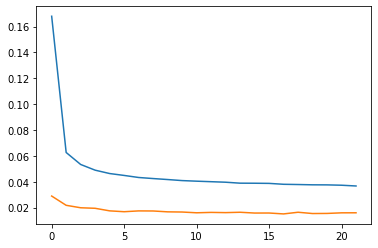

In [25]:
plt.plot(history.history['mse'][:], color ='blue')
plt.plot(history.history['val_mse'][:], color ='orange')

In [76]:
def pred(n, train ,actual):
  results = model.predict(train[n:n+1,:,:])
  plt.figure(figsize=(10,6)) 
  plt.plot(range(150,200),train[n,-50:,0])
  plt.plot(range(200,210), results[0,:,0], color ='red')
  plt.plot(range(200,210),actual[n,:,0], color ='black')


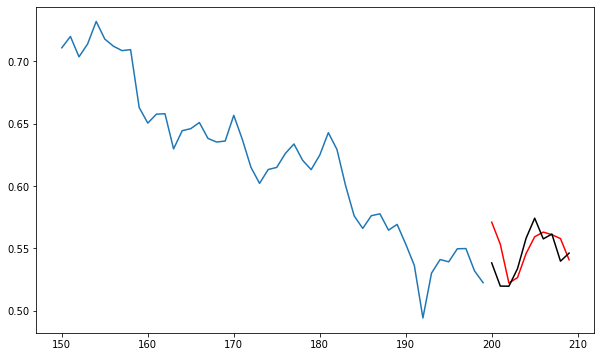

In [77]:
pred(514,encoder_test, decoder_test)

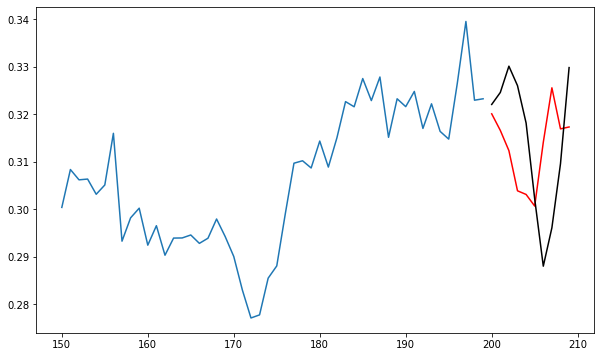

In [78]:
pred(67,encoder_test, decoder_test)

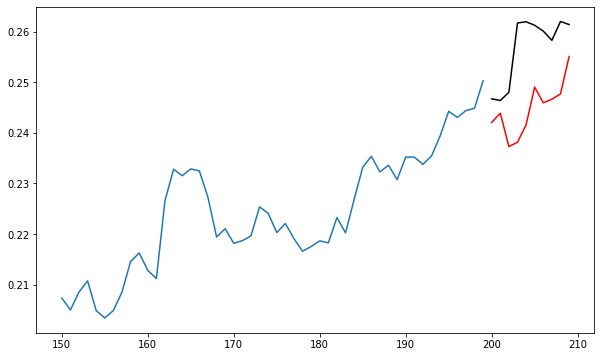

In [79]:
pred(857,encoder_test, decoder_test)

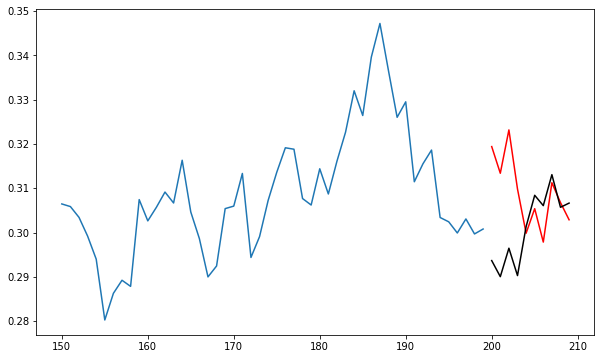

In [81]:
pred(69,encoder_test, decoder_test)

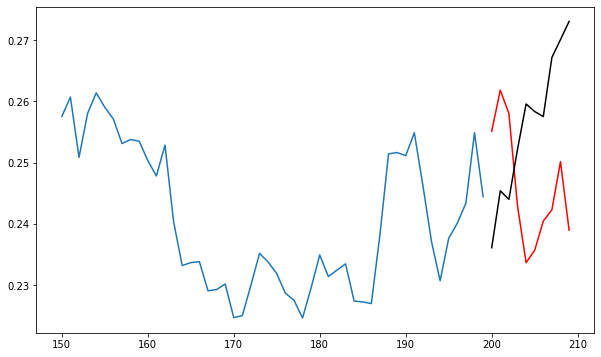

In [83]:
pred(409,encoder_test, decoder_test)

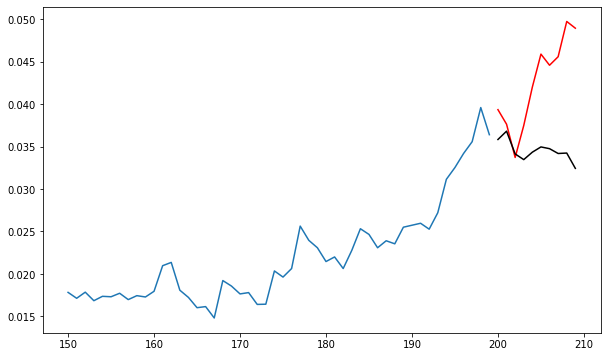

In [85]:
pred(1409,encoder_test, decoder_test)